# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import string
import re
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/cloud_eng/tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


### Value Counts

In [ ]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

### Pie Chart

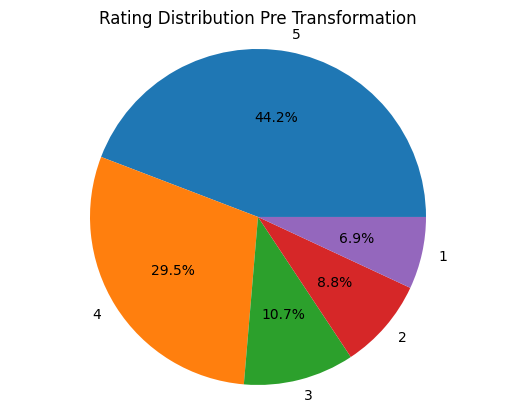

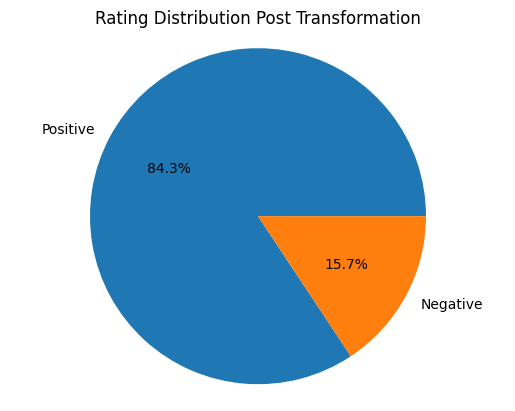

In [ ]:
data['Rating_Category'] = data['Rating'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

column_counts = data['Rating'].value_counts()
labels = column_counts.index
values = column_counts.values

# Plotting the pie chart, pre transform
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Rating Distribution Pre Transformation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

column_counts = data['Rating_Category'].value_counts()
labels = column_counts.index
values = column_counts.values

# Plotting the pie chart, post transform
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Rating Distribution Post Transformation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Length & Word Count

In [ ]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

data['Length'] = data['Review'].str.len()
data['Word_count'] = data['Review'].apply(word_count)
data

,Review,Rating,Rating_Category,Length,Word_count
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,Positive,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,733,109
20487,great location price view hotel great quick pl...,4,Positive,306,39
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,443,63
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,5557,781


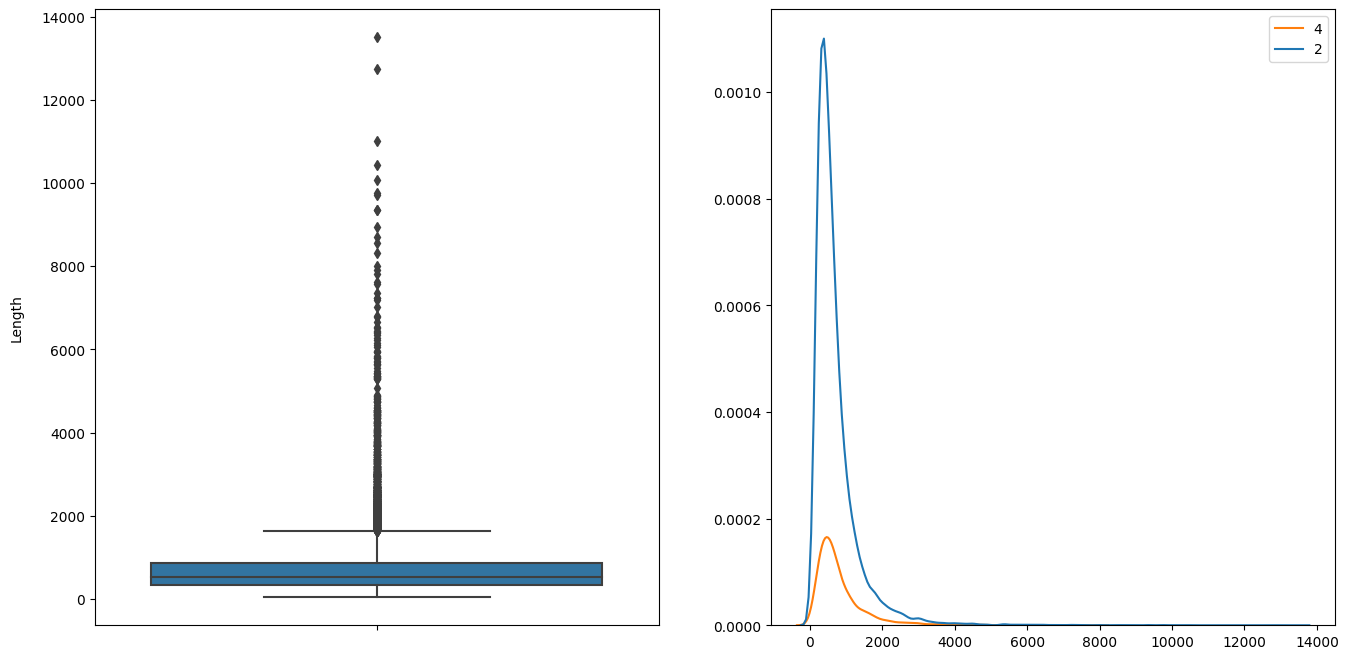

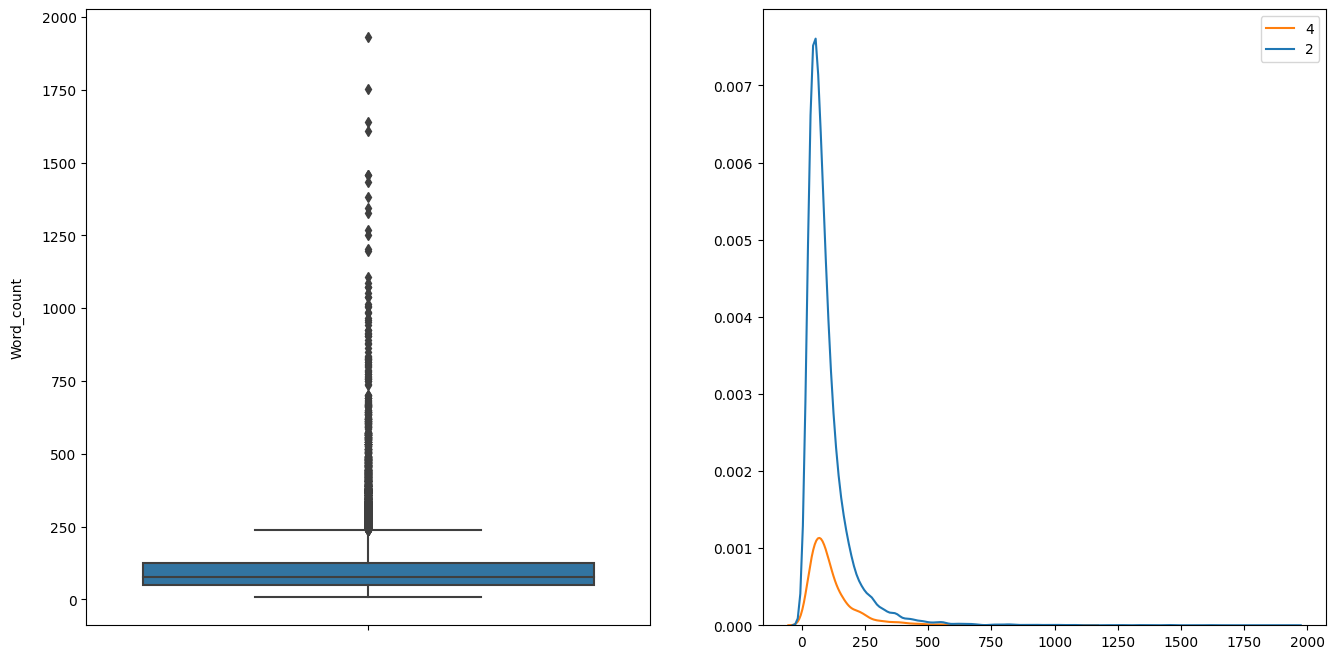

In [ ]:
features = data.columns.tolist()[3:]
for feature in features:
    figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    sns.boxplot(y=data[feature], hue=data['Rating_Category'])
    plt.ylabel(feature, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=data, x=feature, hue='Rating_Category')
    plt.legend(data['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

### Frequency Analysis

In [ ]:
# Assuming your DataFrame is named 'df' and the column containing lists of words is named 'word_list'
documents = data['Review']

vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
term_frequencies = tf_matrix.toarray().sum(axis=0)
sorted_indices = term_frequencies.argsort()[::-1]

# Get the top 40 words and their frequencies
top_40_words = [(feature_names[idx], term_frequencies[idx]) for idx in sorted_indices[:40]]

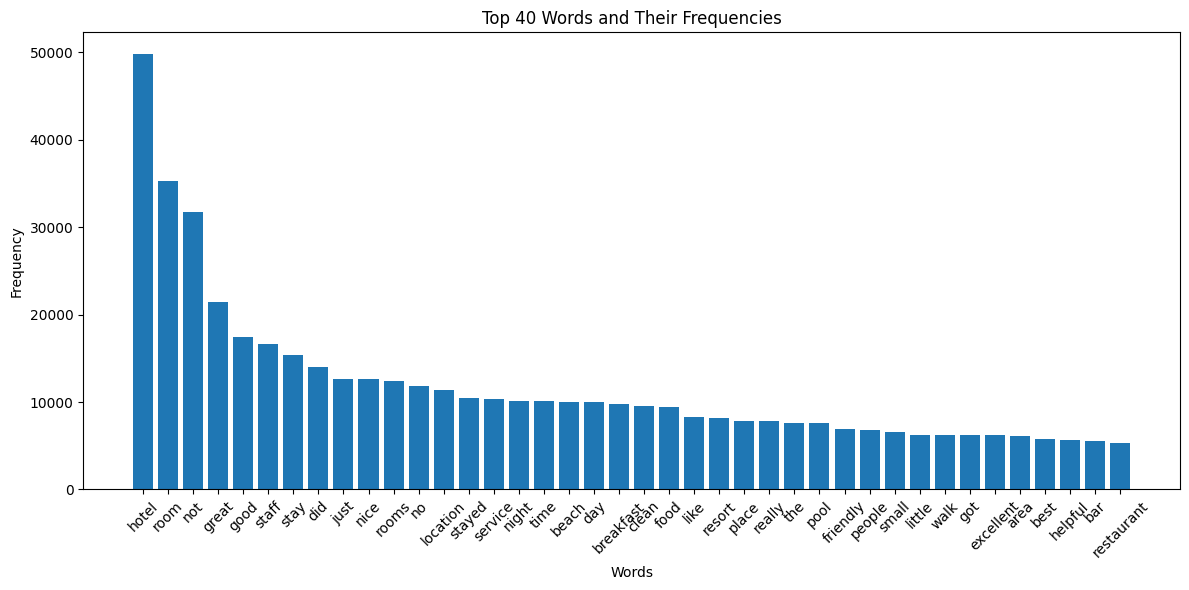

In [ ]:
# Extract the words and frequencies into separate lists
words = [word for word, _ in top_40_words]
frequencies = [freq for _, freq in top_40_words]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 40 Words and Their Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Word Cloud

### All Words

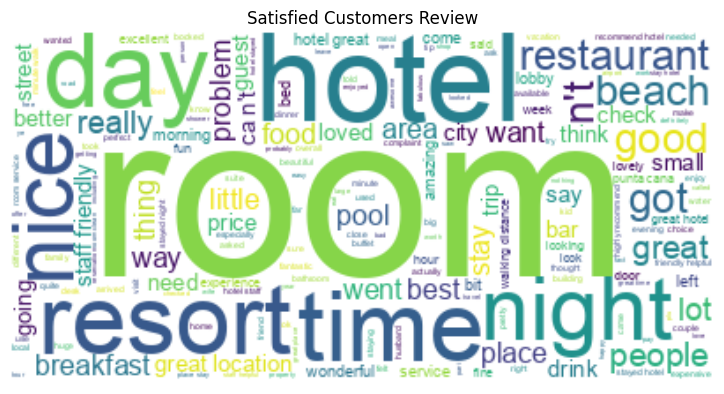

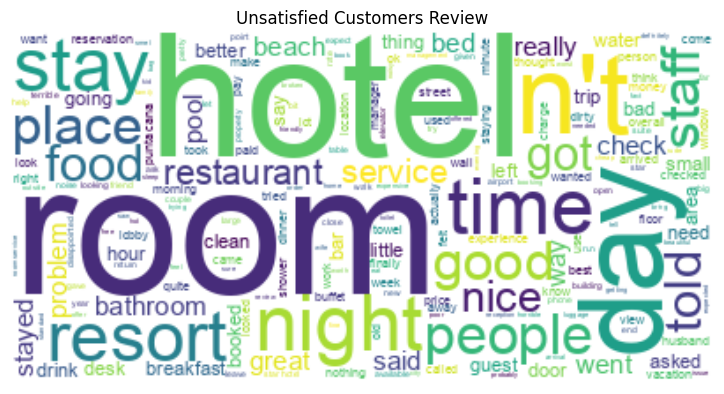

In [ ]:
good_review=data[data.Rating_Category=='Positive']['Review']
bad_review=data[data.Rating_Category=='Negative']['Review']

# Concatenate all the text from the 'text_column' into a single string
figure(figsize=(20, 10))
plt.subplot(1,2,1)
text = ' '.join(good_review)
# Create a WordCloud object
wordcloud = WordCloud(background_color='white', 
                      font_path='/content/drive/My Drive/cloud_eng/arial.ttf').generate(text)
# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Satisfied Customers Review')
plt.axis('off')
plt.show()

figure(figsize=(20, 10))
plt.subplot(1,2,2)
text = ' '.join(bad_review)

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', 
                      font_path='/content/drive/My Drive/cloud_eng/arial.ttf').generate(text)
# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Unsatisfied Customers Review')
plt.axis('off')
plt.show()

### Remove Top Frequency Words

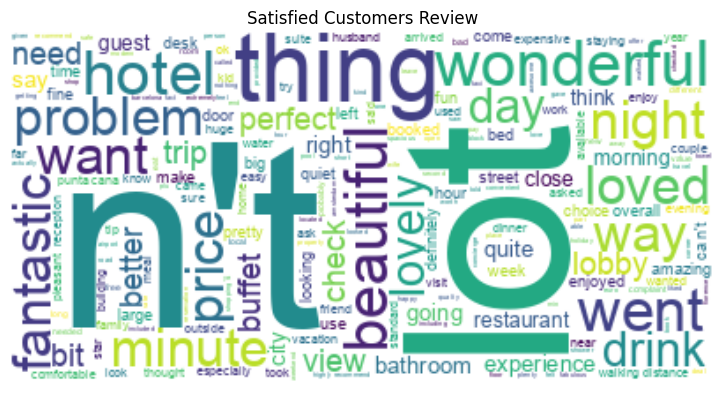

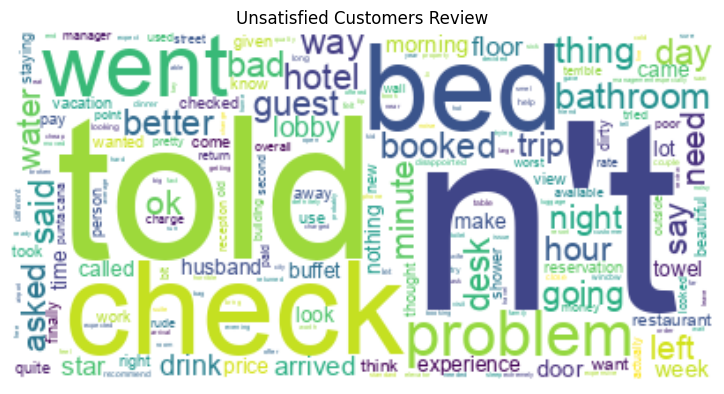

In [ ]:
# remove frequent words
good_review=data[data.Rating_Category=='Positive']['Review']
bad_review=data[data.Rating_Category=='Negative']['Review']

# Word list of words to be removed
remove = words[:40]

words_to_remove=[]
for item in remove:
    words_to_remove.append(item)
    words_to_remove.append(item + ',')

# Concatenate all the text from the 'text_column' into a single string
figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
text = ' '.join(good_review)
text_filtered_new = ' '.join([word for word in text.split(' ') if word not in words_to_remove])

# Create a WordCloud object
wordcloud_new = WordCloud(background_color='white', 
                      font_path='/content/drive/My Drive/cloud_eng/arial.ttf').generate(text_filtered_new)
# Plot the word cloud
plt.imshow(wordcloud_new, interpolation='bilinear')
plt.title('Satisfied Customers Review')
plt.axis('off')
plt.show()

figure(figsize=(20, 10))
plt.subplot(1,2,2)
text = ' '.join(bad_review)
text_filtered_new = ' '.join([word for word in text.split() if word not in words_to_remove])

# Create a WordCloud object
wordcloud_new = WordCloud(background_color='white', 
                      font_path='/content/drive/My Drive/cloud_eng/arial.ttf').generate(text_filtered_new)
# Plot the word cloud
plt.imshow(wordcloud_new, interpolation='bilinear')
plt.title('Unsatisfied Customers Review')
plt.axis('off')
plt.show()